# Multiple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Importing the dataset

In [2]:
%matplotlib inline
sns.set_style('whitegrid')
df = pd.read_csv('Occupancy_Data.csv')
df.head(5)


,Date Time,Occupancy,Temperature,Humidity,Light,CO2,HumidityRatio
0,02/02/15 14:19,1,23.7000,26.272,585.200000,749.200000,0.004764
1,02/02/15 14:19,1,23.7180,26.290,578.400000,760.400000,0.004773
2,02/02/15 14:21,1,23.7300,26.230,572.666667,769.666667,0.004765
3,02/02/15 14:22,1,23.7225,26.125,493.750000,774.750000,0.004744
4,02/02/15 14:23,1,23.7540,26.200,488.600000,779.000000,0.004767


# Encoding the dataset

In [3]:
# Encode date and time




## Raw data visualisation and statistics

In [4]:
df.describe()

,Occupancy,Temperature,Humidity,Light,CO2,HumidityRatio
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,0.364728,21.433876,25.353937,193.227556,717.906470,0.004027
std,0.481444,1.028024,2.436842,250.210906,292.681718,0.000611
min,0.000000,20.200000,22.100000,0.000000,427.500000,0.003303
25%,0.000000,20.650000,23.260000,0.000000,466.000000,0.003529
50%,0.000000,20.890000,25.000000,0.000000,580.500000,0.003815
75%,1.000000,22.356667,26.856667,442.500000,956.333333,0.004532
max,1.000000,24.408333,31.472500,1697.250000,1402.250000,0.005378


In [5]:
df

,Date Time,Occupancy,Temperature,Humidity,Light,CO2,HumidityRatio
0,02/02/15 14:19,1,23.700000,26.272000,585.200000,749.200000,0.004764
1,02/02/15 14:19,1,23.718000,26.290000,578.400000,760.400000,0.004773
2,02/02/15 14:21,1,23.730000,26.230000,572.666667,769.666667,0.004765
3,02/02/15 14:22,1,23.722500,26.125000,493.750000,774.750000,0.004744
4,02/02/15 14:23,1,23.754000,26.200000,488.600000,779.000000,0.004767
...,...,...,...,...,...,...,...
2660,04/02/15 10:38,1,24.290000,25.700000,808.000000,1150.250000,0.004829
2661,04/02/15 10:40,1,24.330000,25.736000,809.800000,1129.200000,0.004848
2662,04/02/15 10:40,1,24.330000,25.700000,817.000000,1125.800000,0.004841
2663,04/02/15 10:41,1,24.356667,25.700000,813.000000,1123.000000,0.004849


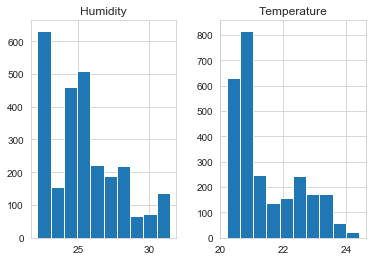

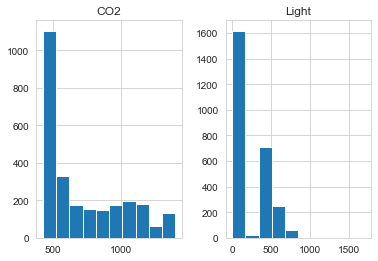

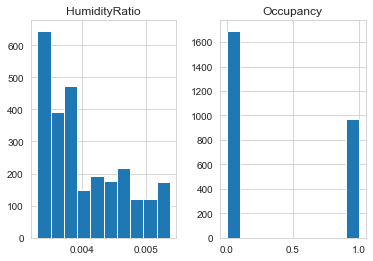

In [6]:
# histogram plots to visualise data distribution
from matplotlib import pyplot
df.hist(column = ['Temperature', 'Humidity'])
df.hist(column = ['CO2','Light'])
df.hist(column = ['HumidityRatio', 'Occupancy'])
pyplot.show()


# #Taking care of missing data

In [7]:
print(df.isnull().sum()) 
print(sum(df.isnull().sum()))

Date Time        0
Occupancy        0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
dtype: int64
0



## Data cleaning Statregy:
<br> No missing data, no out of range data<br> 



## Data visualisation (pre-exploratory)

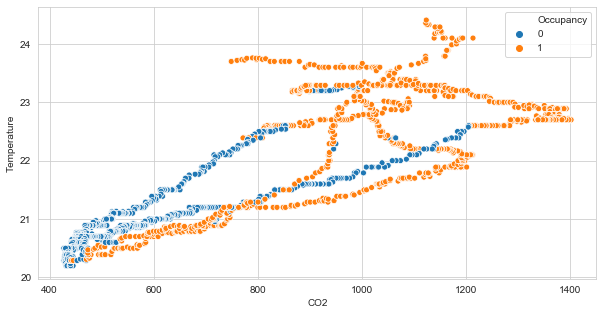

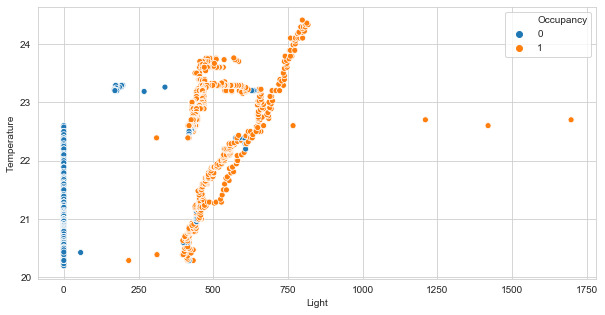

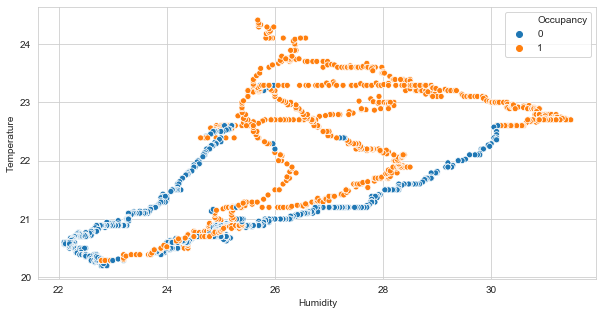

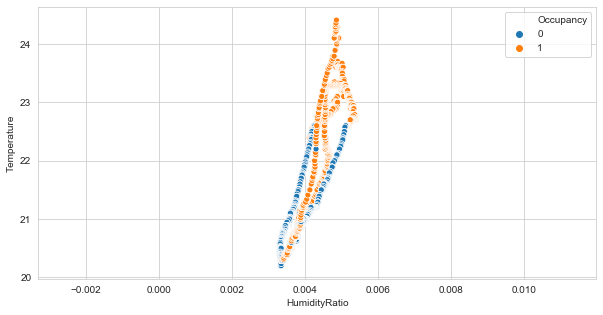

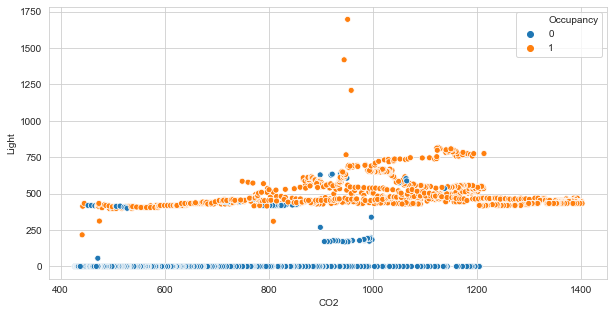

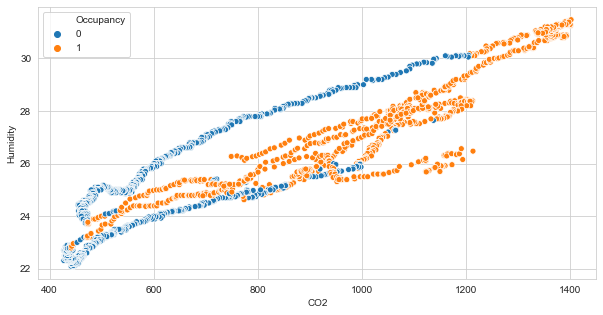

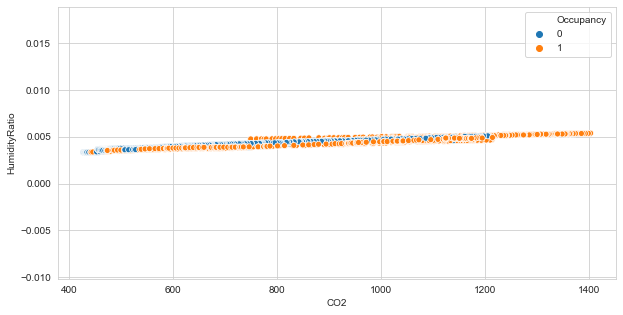

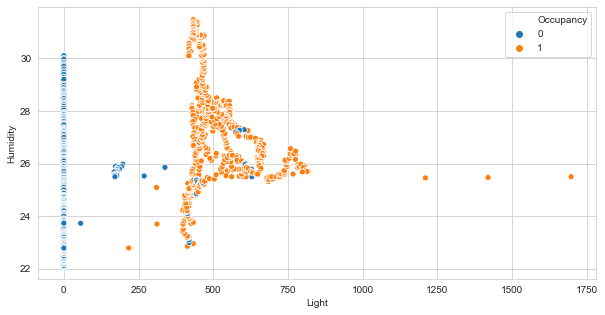

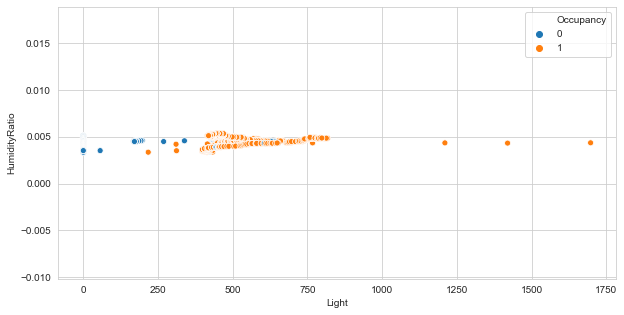

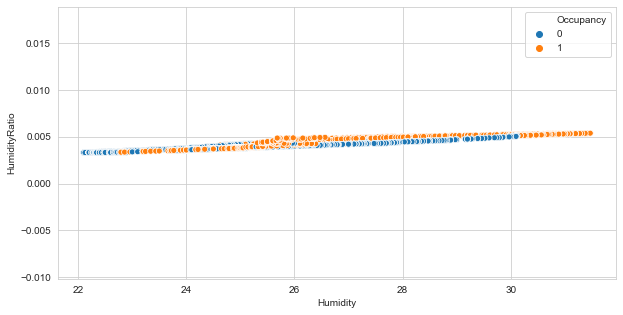

In [8]:
#scatter plots
plt.figure(figsize=(10, 5))
sns.set_style()
sns.scatterplot(data=df, x='CO2', y='Temperature', hue='Occupancy')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Light', y='Temperature', hue='Occupancy')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Humidity', y='Temperature', hue='Occupancy')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df,x='HumidityRatio', y='Temperature', hue='Occupancy')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='CO2', y='Light', hue='Occupancy')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='CO2', y='Humidity', hue='Occupancy')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='CO2', y='HumidityRatio', hue='Occupancy')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Light', y='Humidity', hue='Occupancy')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Light', y='HumidityRatio', hue='Occupancy')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Humidity', y='HumidityRatio', hue='Occupancy')
plt.show()



In [9]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df.iloc[:,1:], test_size = 0.2, random_state = 0)
print(df_train)


      Occupancy  Temperature   Humidity       Light          CO2  \
1280          1    22.200000  27.790000  538.000000  1166.000000   
1912          0    20.945000  25.790000    0.000000   582.250000   
745           0    20.500000  22.365000    0.000000   441.500000   
145           1    22.700000  25.815000  432.750000   920.250000   
1569          1    22.790000  31.114286  441.285714  1359.500000   
...         ...          ...        ...         ...          ...   
1731          0    21.600000  28.500000    0.000000   911.333333   
763           0    20.500000  22.370000    0.000000   435.200000   
835           0    20.390000  22.500000    0.000000   430.000000   
1653          1    22.600000  30.550000  419.000000  1273.333333   
2607          1    22.823333  25.393333  683.000000   961.666667   

      HumidityRatio  
1280       0.004601  
1912       0.003950  
745        0.003329  
145        0.004404  
1569       0.005345  
...             ...  
1731       0.004548  
763    

In [10]:
print(df_test)

      Occupancy  Temperature  Humidity  Light          CO2  HumidityRatio
1763          0    21.390000   27.7900    0.0   806.666667       0.004377
795           0    20.500000   22.3900    0.0   433.500000       0.003333
2099          0    20.790000   24.9450    0.0   526.000000       0.003783
104           1    23.000000   28.0180  429.0  1061.600000       0.004871
1661          1    22.600000   30.3650  419.0  1240.250000       0.005155
...         ...          ...       ...    ...          ...            ...
2321          0    20.620000   24.4120    0.0   462.600000       0.003663
564           0    20.625000   22.2225    0.0   445.000000       0.003334
2328          0    20.680000   24.4780    0.0   464.600000       0.003687
1109          1    20.873333   24.7750  441.0   694.833333       0.003777
666           0    20.600000   22.2000    0.0   451.600000       0.003325

[533 rows x 6 columns]


## Spilting the dataset into train and test sets

In [11]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df_train_scaled= min_max_scaler.fit_transform(df_train)

df_train_scaled= pd.DataFrame(data= df_train_scaled, columns=['Ouccupancy','Temperature', 'Humidity', 'Light', 'CO2','HumidityRatio'])
print(df_train_scaled)
df_test_scaled= min_max_scaler.transform(df_test)
df_test_scaled= pd.DataFrame(data= df_test_scaled, columns=['Ouccupancy','Temperature', 'Humidity', 'Light', 'CO2','HumidityRatio'])
print(df_test_scaled)


      Ouccupancy  Temperature  Humidity     Light       CO2  HumidityRatio
0            1.0     0.475248  0.607095  0.316983  0.757630       0.625397
1            0.0     0.177030  0.393705  0.000000  0.158759       0.311649
2            0.0     0.071287  0.028274  0.000000  0.014363       0.012547
3            1.0     0.594059  0.396372  0.254971  0.505514       0.530693
4            1.0     0.615446  0.961780  0.260000  0.956143       0.984389
...          ...          ...       ...       ...       ...            ...
2127         0.0     0.332673  0.682849  0.000000  0.496367       0.600077
2128         0.0     0.071287  0.028808  0.000000  0.007899       0.012908
2129         0.0     0.045149  0.042678  0.000000  0.002565       0.011301
2130         1.0     0.570297  0.901574  0.246870  0.867744       0.908026
2131         1.0     0.623366  0.351383  0.402416  0.548004       0.511559

[2132 rows x 6 columns]
     Ouccupancy  Temperature  Humidity     Light       CO2  HumidityRatio
0

In [12]:
correlation=df_train_scaled.corr(method='pearson')
print(correlation)

               Ouccupancy  Temperature  Humidity     Light       CO2  \
Ouccupancy       1.000000     0.713070  0.611067  0.926962  0.771128   
Temperature      0.713070     1.000000  0.714242  0.770548  0.869920   
Humidity         0.611067     0.714242  1.000000  0.560238  0.910927   
Light            0.926962     0.770548  0.560238  1.000000  0.769654   
CO2              0.771128     0.869920  0.910927  0.769654  1.000000   
HumidityRatio    0.704326     0.893818  0.951212  0.693837  0.964571   

               HumidityRatio  
Ouccupancy          0.704326  
Temperature         0.893818  
Humidity            0.951212  
Light               0.693837  
CO2                 0.964571  
HumidityRatio       1.000000  


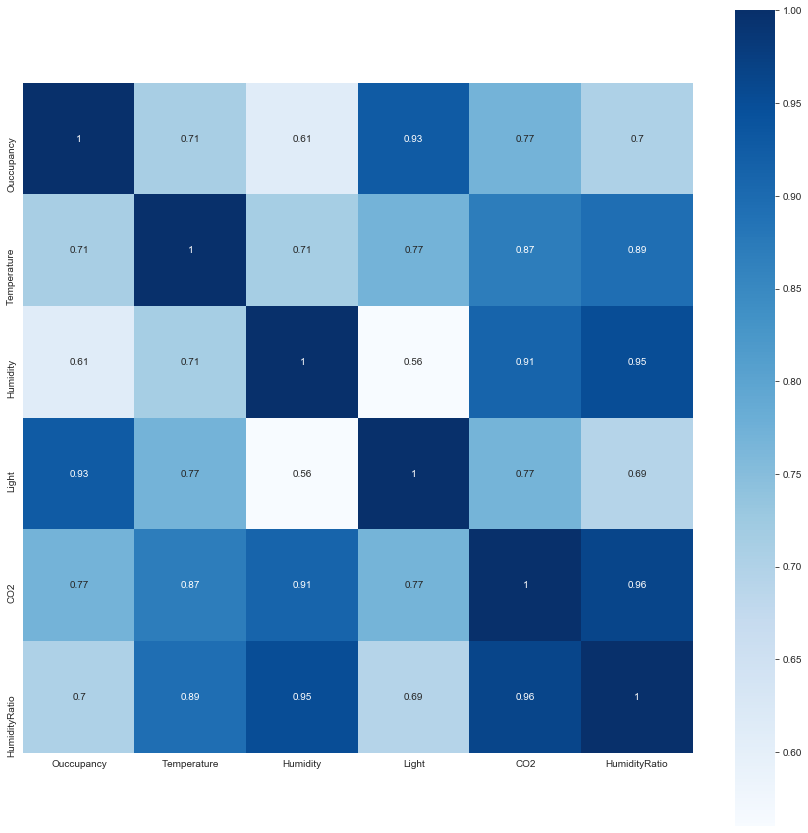

In [13]:
plt.figure(figsize=(15,15))
df_train_corr = df_train_scaled.corr()

sns.heatmap(df_train_scaled.corr(), square=True, annot=True, cmap="Blues");

In [14]:
X_train=df_train_scaled.iloc[:, 1:]
y_train=df_train_scaled.iloc[:,0]
X_test=df_test_scaled.iloc[:, 1:]
y_test=df_test_scaled.iloc[:,0]

## Dimension reduction


## SVM model

In [17]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
parameters = {'kernel':('linear', 'rbf','poly'), 'C':[1, 10,100,1000]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
y_pred_SVM_CV = clf.predict(X_test)

 

cm = confusion_matrix(y_test, y_pred_SVM_CV)
print(cm)
accuracy_score(y_test, y_pred_SVM_CV)

[[337  12]
 [  0 184]]


0.9774859287054409

## Neural network

In [18]:
#Trying Neural Networks (multilayer perceptron)
from sklearn.neural_network import MLPClassifier
maxScore = 0
maxi = 0
maxj = 0
for i in range(2,6):
    for j in range(2,6):
        clf_nn = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(i,j),random_state = 1)
        clf_nn.fit(X_train, y_train)#,batch_size=57, epochs=1000, validation_split=0.2)
        y_pred_nn = clf_nn.predict(X_test)
        print(clf_nn.loss_)


        cm = confusion_matrix(y_test, y_pred_nn)
        print("This is when the layer sizes is: %i,%i" %(i,j))
        print(cm)
        Score = accuracy_score(y_test, y_pred_nn)
        print(Score)
        if (Score > maxScore):
            maxScore= Score
            maxi = i
            maxj = j
print("the best score was when the layer size was: %i,%i with a score of %04f" %(maxi,maxj,maxScore))


0.18232637785721567
This is when the layer sizes is: 2,2
[[326  23]
 [ 18 166]]
0.9230769230769231
0.14865264669058628
This is when the layer sizes is: 2,3
[[328  21]
 [ 10 174]]
0.9418386491557224
0.658745710146898
This is when the layer sizes is: 2,4
[[349   0]
 [184   0]]
0.6547842401500938
0.06502557892042803
This is when the layer sizes is: 2,5
[[337  12]
 [  0 184]]
0.9774859287054409


/Users/garimasingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.06372093047335595
This is when the layer sizes is: 3,2
[[337  12]
 [  1 183]]
0.975609756097561
0.060803113142300025
This is when the layer sizes is: 3,3
[[337  12]
 [  0 184]]
0.9774859287054409
0.08287095680837582
This is when the layer sizes is: 3,4
[[337  12]
 [  1 183]]
0.975609756097561
0.07039981658746212
This is when the layer sizes is: 3,5
[[338  11]
 [  1 183]]
0.9774859287054409
0.6587456784122554
This is when the layer sizes is: 4,2
[[349   0]
 [184   0]]
0.6547842401500938
0.06902726073442736
This is when the layer sizes is: 4,3
[[338  11]
 [  0 184]]
0.9793621013133208
0.06310530756854879
This is when the layer sizes is: 4,4
[[337  12]
 [  0 184]]
0.9774859287054409
0.1682880284848803
This is when the layer sizes is: 4,5
[[324  25]
 [ 12 172]]
0.9305816135084428
0.1492434265432972
This is when the layer sizes is: 5,2
[[330  19]
 [ 22 162]]
0.9230769230769231
0.0668616323268138
This is when the layer sizes is: 5,3
[[338  11]
 [  1 183]]
0.9774859287054409
0.0674823556984

/Users/garimasingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


## Random Forest 

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV


calibrated_forest = CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=10))


pipe = Pipeline([('select', SelectKBest()),('model', calibrated_forest)])
param_grid = {'select__k': [1, 2],'model__base_estimator__max_depth': [2, 4, 6, 8]}



search = GridSearchCV(pipe, param_grid, cv=5).fit(X_train, y_train)
y_pred_Pipe = clf.predict(X_test)


print("Using the score funtion:",clf.score(X_test,y_test))


cm = confusion_matrix(y_test, y_pred_Pipe)
print(cm)
accuracy_score(y_test, y_pred_Pipe)




Using the score funtion: 0.9774859287054409
[[337  12]
 [  0 184]]


0.9774859287054409

## Dimension reduction

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.9002037  0.06617451]


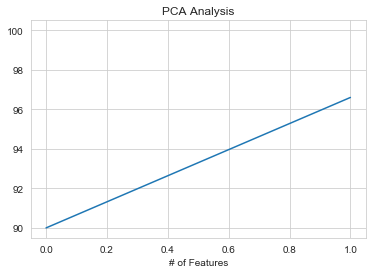

In [29]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] feature
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(89.5,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [30]:
parameters = {'kernel':('linear', 'rbf','poly'), 'C':[1, 10,100,1000]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train_pca, y_train)
y_pred_SVM_CV = clf.predict(X_test_pca)

 

cm = confusion_matrix(y_test, y_pred_SVM_CV)
print(cm)
accuracy_score(y_test, y_pred_SVM_CV)

[[336  13]
 [ 15 169]]


0.9474671669793621

## Result visualisation

In [20]:
#plt.plot(X_test,y_test,'.b')
#plt.plot(X_test,y_pred,'.r')